# 线性回归

## 实现简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

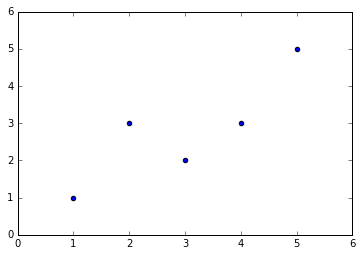

In [4]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [6]:
x_mean,y_mean

(3.0, 2.8)

In [7]:
up=0
for i in range(len(x)):
    uu = (y[i]-y_mean)*(x[i]-x_mean)
    up+=uu
    
down = 0
for i in range(len(x)):
    dd = (x[i]-x_mean)**2
    down+=dd
    
a = up/down

In [8]:
a

0.8

In [9]:
b = y_mean - a * x_mean

In [10]:
b

0.39999999999999947

### 

In [11]:
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num += (x_i-x_mean) * (y_i - y_mean)
    d += (x_i -x_mean) ** 2

In [12]:
a = num / d

In [13]:
b = y_mean - a * x_mean

In [14]:
a , b

(0.8, 0.39999999999999947)

In [15]:
y_hat = a * x + b

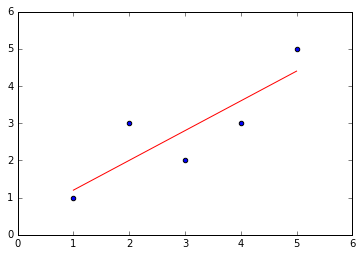

In [16]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')
plt.show()

### 使用自己的SimpleLinearRegression

** 自己封装简单线性回归
** ./playML/SimpleLinearRegression

In [17]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

In [18]:
reg1 = SimpleLinearRegression1()

In [19]:
reg1.fit(x,y)

Simple Linear Regression1()

In [20]:
x_pred = 6

In [21]:
reg1.predict(np.array([x_pred]))

array([5.2])

In [22]:
reg1.a_, reg1.b_

(0.8, 0.39999999999999947)

In [23]:
y_hat = reg1.predict(x)

## 向量化

In [24]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [25]:
reg2 = SimpleLinearRegression()

In [26]:
reg2.fit(x,y)
x_pred = 6

In [27]:
reg2.predict(np.array([x_pred]))

array([5.2])

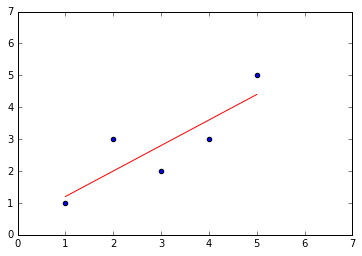

In [28]:
y_hat2 = reg2.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat2,color='r')
plt.axis([0,7,0,7])
plt.show()

### 向量化实现的性能测试

In [29]:
m = 1000000
big_x = np.random.random(size = m)
big_y = big_x * 2.0 + 3.0 +np.random.normal(size=m)

In [30]:
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

1 loop, best of 3: 905 ms per loop
1 loop, best of 3: 905 ms per loop


In [31]:
reg1.a_, reg2.b_

(1.9958431302013115, 3.0016342859575005)

In [32]:
reg2.a_, reg2.b_

(1.9958431302012898, 3.0016342859575005)

## 衡量回归算法的标准

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

** 波士顿房产数据 **

In [34]:
boston = datasets.load_boston()

In [35]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [36]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
x = boston.data[:,5]

In [38]:
y = boston.target

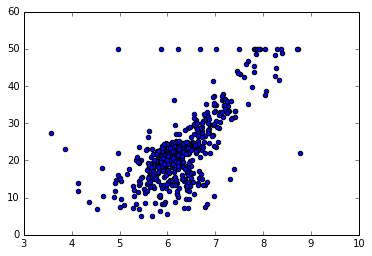

In [39]:
plt.scatter(x, y)
plt.show()

In [40]:
#去除异常值
x = x[y<50.0]
y = y[y<50.0]

### 使用简单线性回归

In [41]:
from playML.my_model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [42]:
x_train.shape

(392,)

In [43]:
x_test.shape

(98,)

In [44]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [45]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

Simple Linear Regression2()

In [47]:
reg.score(x_test, y_test)

0.5687396138361589

In [48]:
reg.a_, reg.b_

(7.983584717252871, -28.159611421718754)

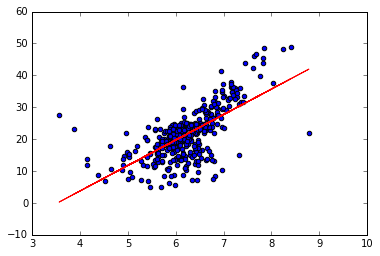

In [49]:
plt.scatter(x_train, y_train)
plt.plot(x_train,reg.predict(x_train), color='r')
plt.show()

In [50]:
y_predict = reg.predict(x_test)

** MSE **

In [51]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

28.218119661876315

** RMSE **

In [52]:
from math import sqrt

rmse_test = sqrt(np.sum((y_predict - y_test)**2) / len(y_test))
rmse_test

5.312073009840538

** MAE **

In [53]:
mae_test = np.sum(np.absolute(y_predict - y_test) / len(y_test))
mae_test

3.978882743360821

### 调用自己封装的

In [54]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [55]:
mse1 = mean_squared_error(y_test, y_predict)
rmse1 = root_mean_squared_error(y_test, y_predict)
mae1 = mean_absolute_error(y_test, y_predict)

In [56]:
mse1, rmse1, mae1

(28.218119661876315, 5.312073009840538, 3.9788827433608205)

### scikit-learn中的MSE和MAE

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [58]:
sk_mse = mean_squared_error(y_test, y_predict)
sk_mae = mean_absolute_error(y_test, y_predict)

In [59]:
sk_mse, sk_mae

(28.218119661876315, 3.9788827433608205)

### R^2

In [60]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.5687396138361589

In [61]:
from playML.metrics import r2_score

In [62]:
r2_score(y_test, y_predict)

0.5687396138361589

### sklearn中的R^2

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, y_predict)

0.5687396138361589

## 多元线性回归

### 实现多元线性回归模型，自己封装的包

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
X.shape, y.shape

((490, 13), (490,))

In [4]:
from playML.my_model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [5]:
from playML.LinearRegression import LinearRegression

reg_mult = LinearRegression()
reg_mult.fit_normal(X_train, y_train)

LinearRegression()

In [6]:
reg_mult.coef_, reg_mult.interception_

(array([-1.18919477e-01,  3.63991462e-02, -3.56494193e-02,  5.66737830e-02,
        -1.16195486e+01,  3.42022185e+00, -2.31470282e-02, -1.19509560e+00,
         2.59339091e-01, -1.40112724e-02, -8.36521175e-01,  7.92283639e-03,
        -3.81966137e-01]), 34.16143549623827)

In [7]:
reg_mult.score(X_test, y_test)

0.81298026026586

In [8]:
reg_mult._theta

array([ 3.41614355e+01, -1.18919477e-01,  3.63991462e-02, -3.56494193e-02,
        5.66737830e-02, -1.16195486e+01,  3.42022185e+00, -2.31470282e-02,
       -1.19509560e+00,  2.59339091e-01, -1.40112724e-02, -8.36521175e-01,
        7.92283639e-03, -3.81966137e-01])

### 使用sklearn中的线性回归

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lin_reg.coef_

array([-1.18919477e-01,  3.63991462e-02, -3.56494193e-02,  5.66737830e-02,
       -1.16195486e+01,  3.42022185e+00, -2.31470282e-02, -1.19509560e+00,
        2.59339091e-01, -1.40112724e-02, -8.36521175e-01,  7.92283639e-03,
       -3.81966137e-01])

In [16]:
lin_reg.intercept_

34.161435496246305

In [17]:
lin_reg.score(X_test, y_test)

0.8129802602658498

### kNN Regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5865412198300899

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    },
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'p': [1, 2, 3, 4, 5], 'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [24]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [25]:
grid_search.best_score_

0.634093080186858

此时得到的score不是在测试集上得到的得分

In [27]:
grid_search.best_estimator_.score(X_test, y_test)

0.7044357727037996

这里得到的score：0.70才是与以上方法同一水准的得分

** 综上，线性回归0.81，sklearn中的KNN—Regressor0.7，说明数据有着强烈的线性关系 **

## 更多关于线性回归模型的讨论

可解释性

In [28]:
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

from sklearn.linear_model import LinearRegression

reg_f = LinearRegression()
reg_f.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
reg_f.coef_

array([-1.05574295e-01,  3.52748549e-02, -4.35179251e-02,  4.55405227e-01,
       -1.24268073e+01,  3.75411229e+00, -2.36116881e-02, -1.21088069e+00,
        2.50740082e-01, -1.37702943e-02, -8.38888137e-01,  7.93577159e-03,
       -3.50952134e-01])

In [30]:
np.argsort(reg_f.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [31]:
boston.feature_names[np.argsort(reg_f.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [35]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      